ロジスティック回帰
====================
--------------------------------------------

ロジスティック回帰は、カテゴリ型変数の予測を行うために使用される。

以下の式により、説明変数$\phi_n$が与えられたときの、クラス$C_k$の確率を得る。

$P(C_{k}|\Phi)=y_{k}(\Phi)=\frac{\displaystyle \exp(a_{k})}{\displaystyle \sum_{j}\exp(a_{j})}$

$a_{k} = W_{k}^T\Phi$

$\Phi$はN×M次元の特徴行列、$W$はM×K次元の重み行列である。

ここで、K=クラス数（いくつに分けるのか）、M=特徴空間の次元（説明変数の数）、N=データ件数（学習データのサイズ）である。

ロジスティック回帰は、特徴行列（説明変数）が与えられたとき、各クラスに属する確率を算出し、確率が最も大きなクラスを予測結果とする。

予測を行うにあたり、$W$を求める必要がある。

$W$は、$\Phi$が与えられたとき、正しいクラスに所属する確率ができる限り大きな確率であるように調整される必要がある。

このためには誤差を定義する必要がある。

ロジスティック回帰の誤差関数は以下のように表される（交差エントロピー誤差関数）。

$E(W_{1},W_{2},\ldots,W_{K})=-\ln{P(T|W_{1},W_{2},\ldots,W_{K})}=\displaystyle -\sum_{n=1}^N\sum_{k=1}^Kt_{nk}\ln{y_{nk}}$

$T$はN×K次元の学習データの目的変数（正解データ）を表す行列である。1-of-K表現のため、個々のレコードはクラス数Kのベクトルで表される。

$
  T=\left(
  \begin{array}{ccc}
   & & \\
   & t_{nk} & \\
   & & \\
  \end{array}
  \right)
$

誤差関数を微分すると、勾配は以下のように求まる。

$\nabla_{W_{k}}{E(W_{1},W_{2},\ldots,W_{K})} = \displaystyle \sum_{n=1}^N{(y_{nk}-t_{nk})\Phi_{n}}$

パラメータ$W$の推定値は、確率的勾配降下法による学習によって求めることができる。
更新式は次の通りである。

$W^{(\tau+1)}=W^{(\tau)}-\eta\nabla{E_{n}}$

すべての学習データについて$\nabla{E_n}=(y_{n}-t_{n})\Phi_{n}$を計算し、上式により更新する。
$W$の初期値はランダムに決め、すべての学習データについて更新することを1ステップとし、ステップごとに学習率$\eta$は減衰させる。

In [19]:
%matplotlib inline
import numpy
import matplotlib.pyplot
import pandas

データを読み込む。tRを1-of-K表現としたものがtである。

In [20]:
X1 = numpy.array([5.1,4.9,4.7,4.6,5,5.4,4.6,5,4.4,4.9,5.4,4.8,4.8,4.3,5.8,5.7,5.4,5.1,5.7,5.1,5.4,5.1,4.6,5.1,4.8,5,5,5.2,5.2,4.7,4.8,5.4,5.2,5.5,4.9,5,5.5,4.9,4.4,5.1,5,4.5,4.4,5,5.1,4.8,5.1,4.6,5.3,5,7,6.4,6.9,5.5,6.5,5.7,6.3,4.9,6.6,5.2,5,5.9,6,6.1,5.6,6.7,5.6,5.8,6.2,5.6,5.9,6.1,6.3,6.1,6.4,6.6,6.8,6.7,6,5.7,5.5,5.5,5.8,6,5.4,6,6.7,6.3,5.6,5.5,5.5,6.1,5.8,5,5.6,5.7,5.7,6.2,5.1,5.7,6.3,5.8,7.1,6.3,6.5,7.6,4.9,7.3,6.7,7.2,6.5,6.4,6.8,5.7,5.8,6.4,6.5,7.7,7.7,6,6.9,5.6,7.7,6.3,6.7,7.2,6.2,6.1,6.4,7.2,7.4,7.9,6.4,6.3,6.1,7.7,6.3,6.4,6,6.9,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9])
X2 = numpy.array([3.5,3,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,3.7,3.4,3,3,4,4.4,3.9,3.5,3.8,3.8,3.4,3.7,3.6,3.3,3.4,3,3.4,3.5,3.4,3.2,3.1,3.4,4.1,4.2,3.1,3.2,3.5,3.6,3,3.4,3.5,2.3,3.2,3.5,3.8,3,3.8,3.2,3.7,3.3,3.2,3.2,3.1,2.3,2.8,2.8,3.3,2.4,2.9,2.7,2,3,2.2,2.9,2.9,3.1,3,2.7,2.2,2.5,3.2,2.8,2.5,2.8,2.9,3,2.8,3,2.9,2.6,2.4,2.4,2.7,2.7,3,3.4,3.1,2.3,3,2.5,2.6,3,2.6,2.3,2.7,3,2.9,2.9,2.5,2.8,3.3,2.7,3,2.9,3,3,2.5,2.9,2.5,3.6,3.2,2.7,3,2.5,2.8,3.2,3,3.8,2.6,2.2,3.2,2.8,2.8,2.7,3.3,3.2,2.8,3,2.8,3,2.8,3.8,2.8,2.8,2.6,3,3.4,3.1,3,3.1,3.1,3.1,2.7,3.2,3.3,3,2.5,3,3.4,3])
X3 = numpy.array([1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,1.5,1.6,1.4,1.1,1.2,1.5,1.3,1.4,1.7,1.5,1.7,1.5,1,1.7,1.9,1.6,1.6,1.5,1.4,1.6,1.6,1.5,1.5,1.4,1.5,1.2,1.3,1.4,1.3,1.5,1.3,1.3,1.3,1.6,1.9,1.4,1.6,1.4,1.5,1.4,4.7,4.5,4.9,4,4.6,4.5,4.7,3.3,4.6,3.9,3.5,4.2,4,4.7,3.6,4.4,4.5,4.1,4.5,3.9,4.8,4,4.9,4.7,4.3,4.4,4.8,5,4.5,3.5,3.8,3.7,3.9,5.1,4.5,4.5,4.7,4.4,4.1,4,4.4,4.6,4,3.3,4.2,4.2,4.2,4.3,3,4.1,6,5.1,5.9,5.6,5.8,6.6,4.5,6.3,5.8,6.1,5.1,5.3,5.5,5,5.1,5.3,5.5,6.7,6.9,5,5.7,4.9,6.7,4.9,5.7,6,4.8,4.9,5.6,5.8,6.1,6.4,5.6,5.1,5.6,6.1,5.6,5.5,4.8,5.4,5.6,5.1,5.1,5.9,5.7,5.2,5,5.2,5.4,5.1])
X4 = numpy.array([0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,0.2,0.2,0.1,0.1,0.2,0.4,0.4,0.3,0.3,0.3,0.2,0.4,0.2,0.5,0.2,0.2,0.4,0.2,0.2,0.2,0.2,0.4,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.3,0.3,0.2,0.6,0.4,0.3,0.2,0.2,0.2,0.2,1.4,1.5,1.5,1.3,1.5,1.3,1.6,1,1.3,1.4,1,1.5,1,1.4,1.3,1.4,1.5,1,1.5,1.1,1.8,1.3,1.5,1.2,1.3,1.4,1.4,1.7,1.5,1,1.1,1,1.2,1.6,1.5,1.6,1.5,1.3,1.3,1.3,1.2,1.4,1.2,1,1.3,1.2,1.3,1.3,1.1,1.3,2.5,1.9,2.1,1.8,2.2,2.1,1.7,1.8,1.8,2.5,2,1.9,2.1,2,2.4,2.3,1.8,2.2,2.3,1.5,2.3,2,2,1.8,2.1,1.8,1.8,1.8,2.1,1.6,1.9,2,2.2,1.5,1.4,2.3,2.4,1.8,1.8,2.1,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2,2.3,1.8])
tR  = numpy.array(['setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica'])
def tcode(t):
    return([1 if t == 'setosa' else 0, 1 if t == 'versicolor' else 0, 1 if t == 'virginica' else 0])
t = numpy.array([tcode(t) for t in tR])
df = pandas.DataFrame({
        'Species' : tR,
        'Sepal.Length' : X1,
        'Sepal.Width' : X2,
        'Petal.Length' : X3,
        'Petal.Width' : X4
        })

データとしてはirisデータを使用する。

In [21]:
df.ix[ range(0,3), :][["Species","Sepal.Length","Sepal.Width","Petal.Length","Petal.Width"]]

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2


In [22]:
df.ix[ range(50,53), :][["Species","Sepal.Length","Sepal.Width","Petal.Length","Petal.Width"]]

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
50,versicolor,7.0,3.2,4.7,1.4
51,versicolor,6.4,3.2,4.5,1.5
52,versicolor,6.9,3.1,4.9,1.5


In [23]:
df.ix[ range(100,103), :][["Species","Sepal.Length","Sepal.Width","Petal.Length","Petal.Width"]]

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
100,virginica,6.3,3.3,6.0,2.5
101,virginica,5.8,2.7,5.1,1.9
102,virginica,7.1,3.0,5.9,2.1


K=クラス数, M=説明変数数+1, N=ケース数である。重みWの初期値はランダムとし、確率的勾配降下法により、更新することでWを定める。

In [24]:
K = 3
M = 4+1
N = 150

In [25]:
W = numpy.random.randn(M,K)
W

array([[-1.9574153 ,  1.0409926 ,  1.34626883],
       [ 0.70500804, -0.05573952, -0.62673126],
       [ 0.11527041,  0.23229927,  0.88334173],
       [ 1.72632379,  0.01862747, -1.3242289 ],
       [-0.67624588,  0.54694815, -0.53218331]])

読み込んだ値から特徴行列$\Phi$を定義するにあたり、標準化しておくこととする。

In [26]:
def scale(x):
    return(x-numpy.mean(x))/numpy.std(x)
PHI = numpy.array([numpy.array([1 for x in X1]), scale(X1),scale(X2),scale(X3),scale(X4)]).T
#PHI = numpy.array([numpy.array([1 for x in X1]), X1,X2,X3,X4]).T
PHI

array([[  1.00000000e+00,  -9.00681170e-01,   1.01900435e+00,
         -1.34022653e+00,  -1.31544430e+00],
       [  1.00000000e+00,  -1.14301691e+00,  -1.31979479e-01,
         -1.34022653e+00,  -1.31544430e+00],
       [  1.00000000e+00,  -1.38535265e+00,   3.28414053e-01,
         -1.39706395e+00,  -1.31544430e+00],
       [  1.00000000e+00,  -1.50652052e+00,   9.82172869e-02,
         -1.28338910e+00,  -1.31544430e+00],
       [  1.00000000e+00,  -1.02184904e+00,   1.24920112e+00,
         -1.34022653e+00,  -1.31544430e+00],
       [  1.00000000e+00,  -5.37177559e-01,   1.93979142e+00,
         -1.16971425e+00,  -1.05217993e+00],
       [  1.00000000e+00,  -1.50652052e+00,   7.88807586e-01,
         -1.34022653e+00,  -1.18381211e+00],
       [  1.00000000e+00,  -1.02184904e+00,   7.88807586e-01,
         -1.28338910e+00,  -1.31544430e+00],
       [  1.00000000e+00,  -1.74885626e+00,  -3.62176246e-01,
         -1.34022653e+00,  -1.31544430e+00],
       [  1.00000000e+00,  -1.1430169

事後確率を関数として定義する。実装において、max(a)を各aから減じているのはオーバーフローを防ぐためである。

$P(C_{k}|\Phi)=y_{k}(\Phi)=\frac{\displaystyle \exp(a_{k})}{\displaystyle \sum_{j}\exp(a_{j})}$

$a_{k} = W_{k}^T\Phi$


In [27]:
def probc(phi, w):
    a = numpy.dot(phi, w)
    a = numpy.exp(a - numpy.max(a))
    return a/numpy.sum(a)

In [28]:
probc(PHI[1], W)

array([  1.76852063e-04,   1.64401158e-02,   9.83383032e-01])

ここでは、1ケースについての誤差と勾配を算出している。

$E(W_{1},W_{2},\ldots,W_{K})=-\ln{P(T|W_{1},W_{2},\ldots,W_{K})}=\displaystyle -\sum_{n=1}^N\sum_{k=1}^Kt_{nk}\ln{y_{nk}}$

$\nabla_{W_{k}}{E(W_{1},W_{2},\ldots,W_{K})} = \displaystyle \sum_{n=1}^N{(y_{nk}-t_{nk})\Phi_{n}}$

In [39]:
def En(phi, t, w):
    return -numpy.log(sum(probc(phi, w)*t))

def dEn(phi, t, w):
    return numpy.outer(phi, probc(phi, w) - t)

現時点では誤差は以下のように計算される。Enは1ケースについての誤差であるため、誤差を合計している。

In [30]:
error = 0
for i in xrange(150):
    error += En(PHI[i], t[i], W)
error

638.74685578105266

実際に更新することにより、どのように変化するかを見ていくこととする。

In [31]:
eta = 0.1

In [32]:
nlist = range(150)
numpy.random.shuffle(nlist)
for i in nlist:
    W = W - eta * dEn(PHI[i], t[i], W)
eta *= 0.95
W

array([[-0.87140459,  1.066527  ,  0.23472371],
       [-0.70507335,  0.15101712,  0.57659349],
       [ 1.15550154, -0.24588408,  0.32129395],
       [-0.12155119,  0.05817698,  0.48409656],
       [-2.35514774,  0.19581535,  1.49785135]])

In [33]:
error = 0
for i in xrange(150):
    error += En(PHI[i], t[i], W)
error

43.242312923522192

In [34]:
nlist = range(150)
numpy.random.shuffle(nlist)
for i in nlist:
    W = W - eta * dEn(PHI[i], t[i], W)
eta *= 0.95
W

array([[-0.81229695,  1.3637173 , -0.12157422],
       [-0.90407578,  0.30082155,  0.62579149],
       [ 1.24151367, -0.14183914,  0.13123687],
       [-0.39278507, -0.04323606,  0.85674348],
       [-2.59449524, -0.0900126 ,  2.0230268 ]])

In [35]:
error = 0
for i in xrange(150):
    error += En(PHI[i], t[i], W)
error

33.717243853556646

以下で、学習がどの程度進んでいるかを確認する。更新すると、精度が改善することを確認することができる。

In [36]:
plist = numpy.array([numpy.argmax(probc(PHI[i], W)) for i in range(150)])
clist = numpy.array([numpy.argmax(t[i]) for i in range(150)])

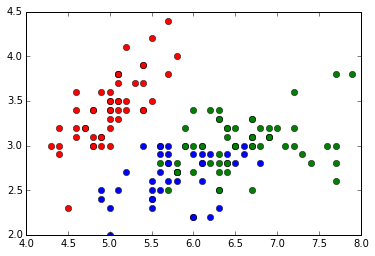

In [37]:
matplotlib.pyplot.plot(X1[plist==0], X2[plist==0], 'o', color = 'red')
matplotlib.pyplot.plot(X1[plist==1], X2[plist==1], 'o', color = 'blue')
matplotlib.pyplot.plot(X1[plist==2], X2[plist==2], 'o', color = 'green')

In [38]:
df = pandas.DataFrame({
        'Predict' : plist,
        'Answer' : clist
        })
pandas.crosstab(df.Predict, df.Answer, margins=True)


Answer,0,1,2,All
Predict,,,,
0,50,0,0,50
1,0,41,3,44
2,0,9,47,56
All,50,50,50,150
